In [100]:
# Make external packages available
from numpy import *
import matplotlib
from matplotlib import pyplot as plt
%pylab inline
import sys
import os
from astropy.io import ascii
from astropy.io import fits
from astropy import wcs
from astropy.wcs import WCS
from astropy import units as u
from astropy.coordinates import SkyCoord
from PIL import Image
import aplpy
from astropy.coordinates import SkyCoord, FK4, FK5, Galactic
import Polygon

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [99]:
hdulist = fits.open('M81HIM0.fits')
primary_hdu = hdulist[0]
hdr = primary_hdu.header
w = WCS(hdr, naxis=[1,2])

M81_HI = primary_hdu.data[0,:,:]

print w.naxis
print M81_HI.shape

2
(687L, 579L)
test


In [15]:
#0 indexing for sure
w_ra, w_dec = w.all_pix2world(245., 245., 0)
print(w_ra, w_dec)
print "val at ra:", w_ra, ", dec:", w_dec, "is", M81_HI[245, 245]

(array(148.59788158622612), array(69.11966652819584))
val at ra: 148.597881586 , dec: 69.1196665282 is 50.9443


In [16]:
imax = len(M81_HI[1,:])/1
jmax = len(M81_HI[:,1])/1
for i in range(imax):
    for j in range(jmax):
        w_ra, w_dec = w.all_pix2world(i, j, 0)
        #print(w_ra, w_dec, w_freq)
        #print "val at ra:", w_ra, ", dec:", w_dec, "is", M81_HI[i, j]

In [17]:
pixra = list()
pixdec = list()
pixdata = list()
pixlist = list()
radecindex = 0
imax = len(M81_HI[1,:])/1
jmax = len(M81_HI[:,1])/1
for i in range(imax):
    for j in range(jmax):
        w_ra, w_dec = w.all_pix2world(i, j, 0)
        val = M81_HI[j, i]
        pixra.append(w_ra)
        pixdec.append(w_dec)
        pixdata.append(val)
        radecindex = radecindex+1
        
        pixlist.append([float(w_ra), float(w_dec), val])
        
        #plot(x="w_ra", y="w_dec", data={w_ra} fmt='k.')#, color=val)

print size(pixlist)

1193319


In [18]:
ra_t = array(pixra)
dec_t = array(pixdec)
data_t = array(pixdata)
list_t = array(pixlist)

ra_t.shape
#help(array)

(397773L,)

In [19]:
print pixlist[0][0]
print pixlist[0][1]
print pixlist[0][2]
print pixlist[3]
print pixlist[4]
print pixlist[5]

150.406963715
68.4144526319
0.0
[150.40812747959254, 68.42277515231015, 0.0]
[150.40851560558545, 68.42554932191055, 0.0]
[150.4089038339509, 68.42832348958389, 0.0]


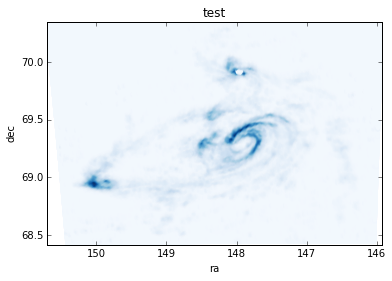

In [20]:
plt.scatter(x=pixra, y=pixdec, c=pixdata, marker='o', edgecolors='none', cmap=matplotlib.cm.Blues)
axis([max(pixra),min(pixra),min(pixdec),max(pixdec)])
xlabel('ra')
ylabel('dec')
plt.title('test')

In [21]:
scoords = SkyCoord(ra=pixra, dec=pixdec, unit=(u.deg, u.deg), frame='fk4')

In [22]:
sc2000 = scoords.transform_to('icrs')

In [23]:
print pixra[0]
print sc2000.ra.deg[0]

print pixra[500]
print sc2000.ra.deg[500]

150.406963715
151.387616525
150.614519678
151.618162444


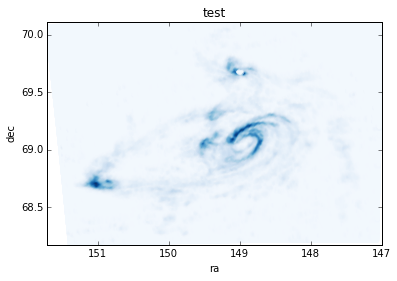

In [24]:
plt.scatter(x=sc2000.ra.deg, y=sc2000.dec.deg, c=pixdata, marker='o', edgecolors='none', cmap=matplotlib.cm.Blues)
axis([max(sc2000.ra.deg),min(sc2000.ra.deg),min(sc2000.dec.deg),max(sc2000.dec.deg)])
xlabel('ra')
ylabel('dec')
plt.title('test')

In [101]:
help(Polygon)

Help on package Polygon:

NAME
    Polygon - # -*- coding: utf-8 -*-

FILE
    c:\users\parker\anaconda\lib\site-packages\polygon\__init__.py

PACKAGE CONTENTS
    IO
    Shapes
    Utils
    cPolygon

CLASSES
    __builtin__.object
        cPolygon.Polygon
    exceptions.Exception(exceptions.BaseException)
        cPolygon.Error
    
    class Error(exceptions.Exception)
     |  Method resolution order:
     |      Error
     |      exceptions.Exception
     |      exceptions.BaseException
     |      __builtin__.object
     |  
     |  Data descriptors defined here:
     |  
     |  __weakref__
     |      list of weak references to the object (if defined)
     |  
     |  ----------------------------------------------------------------------
     |  Methods inherited from exceptions.Exception:
     |  
     |  __init__(...)
     |      x.__init__(...) initializes x; see help(type(x)) for signature
     |  
     |  ---------------------------------------------------------------------

In [144]:
pixgrid = list()
imax = len(M81_HI[1,:])/1
jmax = len(M81_HI[:,1])/1
for i in range(imax):
    for j in range(jmax):
        point = [i, j]
        pixgrid.append(point)

pixgrid[318056]

[462, 662]

In [145]:
smallgrid = [pixgrid[1711], pixgrid[687], pixgrid[2061], pixgrid[3456]]

print smallgrid

small = Polygon.Polygon(smallgrid)

[[2, 337], [1, 0], [3, 0], [5, 21]]
[0, 0]


In [172]:
#good_pix = list()
truth_table = list()
for p in range(len(pixgrid)):
    t = small.isInside(pixgrid[p][0],pixgrid[p][1])
    #if (t == 1):
        #good_pix.append(p)
        #print M81_HI[pixgrid[p][0]][pixgrid[p][1]]
    truth_table.append(t)

in_small, = where(truth_table)
#print in_small
just_small = list()
for i in in_small:
     just_small.append(pixgrid[i])
#print just_small

HI_small = list()
for c in range(len(just_small)):
    HI_small.append(M81_HI[just_small[c][0]][just_small[c][1]])
#print HI_small

print median(HI_small), mean(HI_small)

0.0 3.52009


###BAD###

In [85]:
#plt.pcolor(ra_t, dec_t, M81_HI, cmap=matplotlib.cm.Blues)

In [43]:
c = 0
p = 0
while (c < size(pixlist)):
    if (pixlist[p][2] > 0.0):
        plot(x=pixlist[p][0], y=pixlist[p][1], fmt='k.')
        print p,"/ 397773"
    c = c + 3
    p = p + 1

#imax = len(M81_HI[:,1])/1
#jmax = len(M81_HI[1,:])/1
#for i in range(imax):
#    for j in range(jmax):
#        w_dec, w_ra, w_freq = w.all_pix2world(1., i, j, 0)
        #print(w_ra, w_dec, w_freq)
        #print "val at ra:", w_ra, ", dec:", w_dec, "is", M81_HI[i, j]

KeyboardInterrupt: 

[[ 0.9551404   0.90540113  0.12598746  0.27353855]
 [ 0.40583713  0.36585957  0.47010191  0.32746503]
 [ 0.08546796  0.45000069  0.88734638  0.00962889]
 [ 0.70557546  0.75400904  0.84235046  0.30258724]]


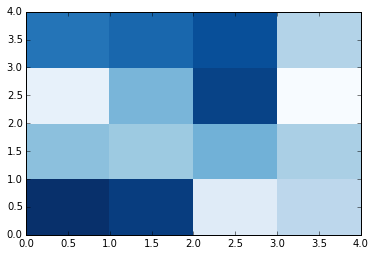

In [35]:
data = numpy.random.rand(4,4)
print data
#print pixlist[357]
heatmap = plt.pcolor(data, cmap=matplotlib.cm.Blues)

In [37]:
help(pcolor)

Help on function pcolor in module matplotlib.pyplot:

pcolor(*args, **kwargs)
    Create a pseudocolor plot of a 2-D array.
    
    .. note::
    
        pcolor can be very slow for large arrays; consider
        using the similar but much faster
        :func:`~matplotlib.pyplot.pcolormesh` instead.
    
    Call signatures::
    
      pcolor(C, **kwargs)
      pcolor(X, Y, C, **kwargs)
    
    *C* is the array of color values.
    
    *X* and *Y*, if given, specify the (*x*, *y*) coordinates of
    the colored quadrilaterals; the quadrilateral for C[i,j] has
    corners at::
    
      (X[i,   j],   Y[i,   j]),
      (X[i,   j+1], Y[i,   j+1]),
      (X[i+1, j],   Y[i+1, j]),
      (X[i+1, j+1], Y[i+1, j+1]).
    
    Ideally the dimensions of *X* and *Y* should be one greater
    than those of *C*; if the dimensions are the same, then the
    last row and column of *C* will be ignored.
    
    Note that the the column index corresponds to the
    *x*-coordinate, and the row in